# Datetime Module

Chiara V. V. L  

## Importaciones y carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/minambiente2023.csv'

column_names = ['fecha', 'pm10', 'pm2-5', 'velo-viento', 'precipitacion', 'direccion', 'o3', 'co', 'no', 'no2', 'nox']
df = pd.read_csv(url, sep=';', names=column_names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fecha          8760 non-null   object
 1   pm10           8760 non-null   object
 2   pm2-5          8760 non-null   object
 3   velo-viento    8760 non-null   object
 4   precipitacion  8760 non-null   object
 5   direccion      8760 non-null   object
 6   o3             8760 non-null   object
 7   co             8760 non-null   object
 8   no             8760 non-null   object
 9   no2            8760 non-null   object
 10  nox            8760 non-null   object
dtypes: object(11)
memory usage: 752.9+ KB


## Limpieza de datos

In [4]:
df.replace('----', pd.NA, inplace=True)
df.dropna(inplace=True)
df['fecha'] = df['fecha'].str.replace('24:00', '23:59')

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)
df.set_index('fecha', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 2023-12-13 16:00:00 to 2023-12-31 23:59:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pm10           416 non-null    object
 1   pm2-5          416 non-null    object
 2   velo-viento    416 non-null    object
 3   precipitacion  416 non-null    object
 4   direccion      416 non-null    object
 5   o3             416 non-null    object
 6   co             416 non-null    object
 7   no             416 non-null    object
 8   no2            416 non-null    object
 9   nox            416 non-null    object
dtypes: object(10)
memory usage: 35.8+ KB


## Gráficas

### Grupales

In [7]:
contaminantes = ['pm10', 'pm2-5', 'o3', 'co', 'no', 'no2', 'nox']
factores = ['velo-viento', 'precipitacion', 'direccion']

for col in factores:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in contaminantes:
    df[col] = pd.to_numeric(df[col], errors='coerce')

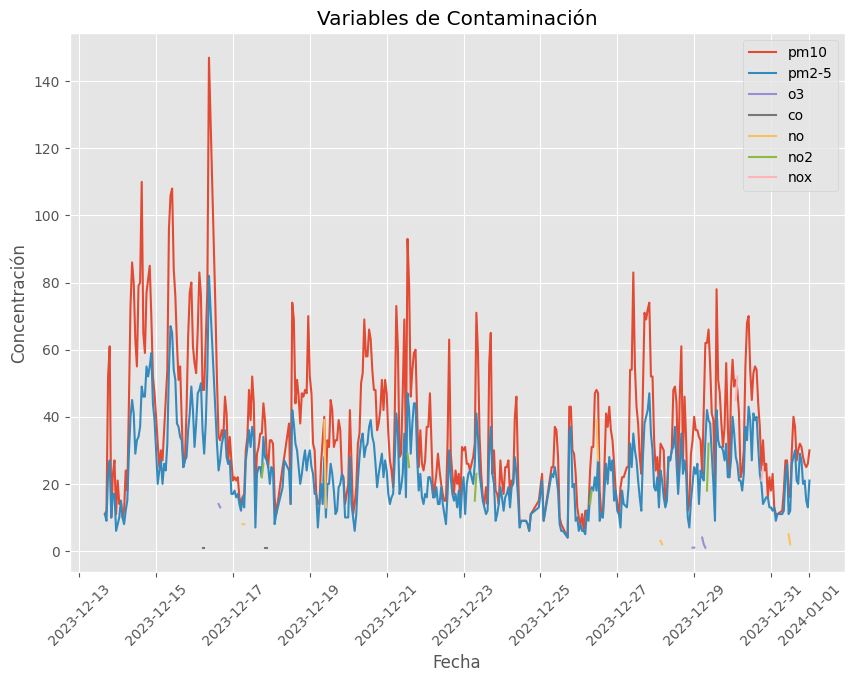

In [8]:
plt.figure(figsize=(10,7))

for col in contaminantes:
    plt.plot(df[col], label=col)

plt.title('Variables de Contaminación')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.xticks(rotation=45)
plt.show()

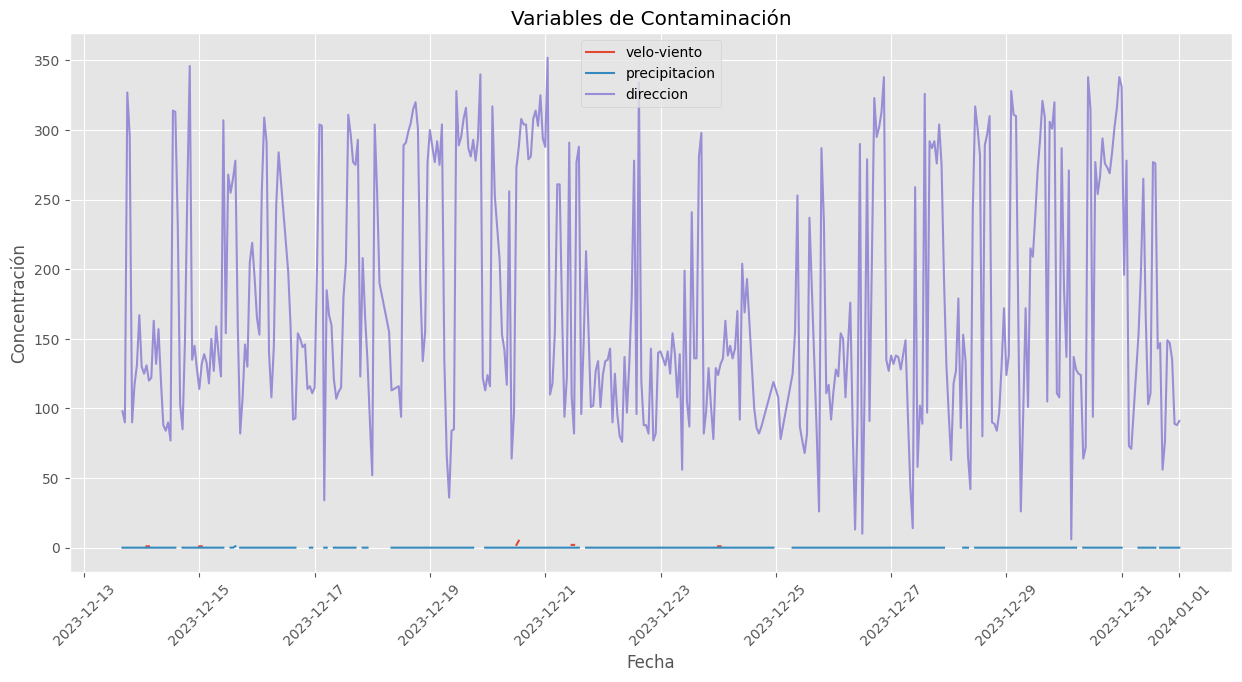

In [9]:
plt.figure(figsize=(15, 7))

for col in factores:
    plt.plot(df[col], label=col)

plt.title('Variables de Contaminación')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Individuales

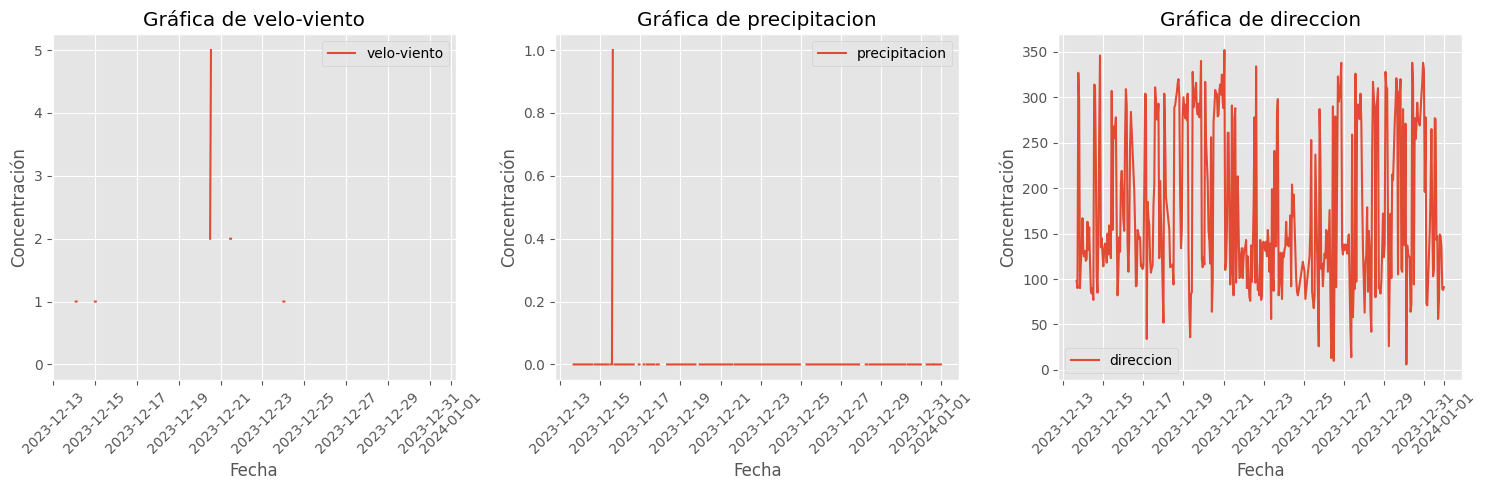

In [10]:
num_cols = len(factores)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5*num_cols, 5))

for i, col in enumerate(factores):
    axes[i].plot(df[col], label=col)
    axes[i].set_title(f'Gráfica de {col}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Concentración')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

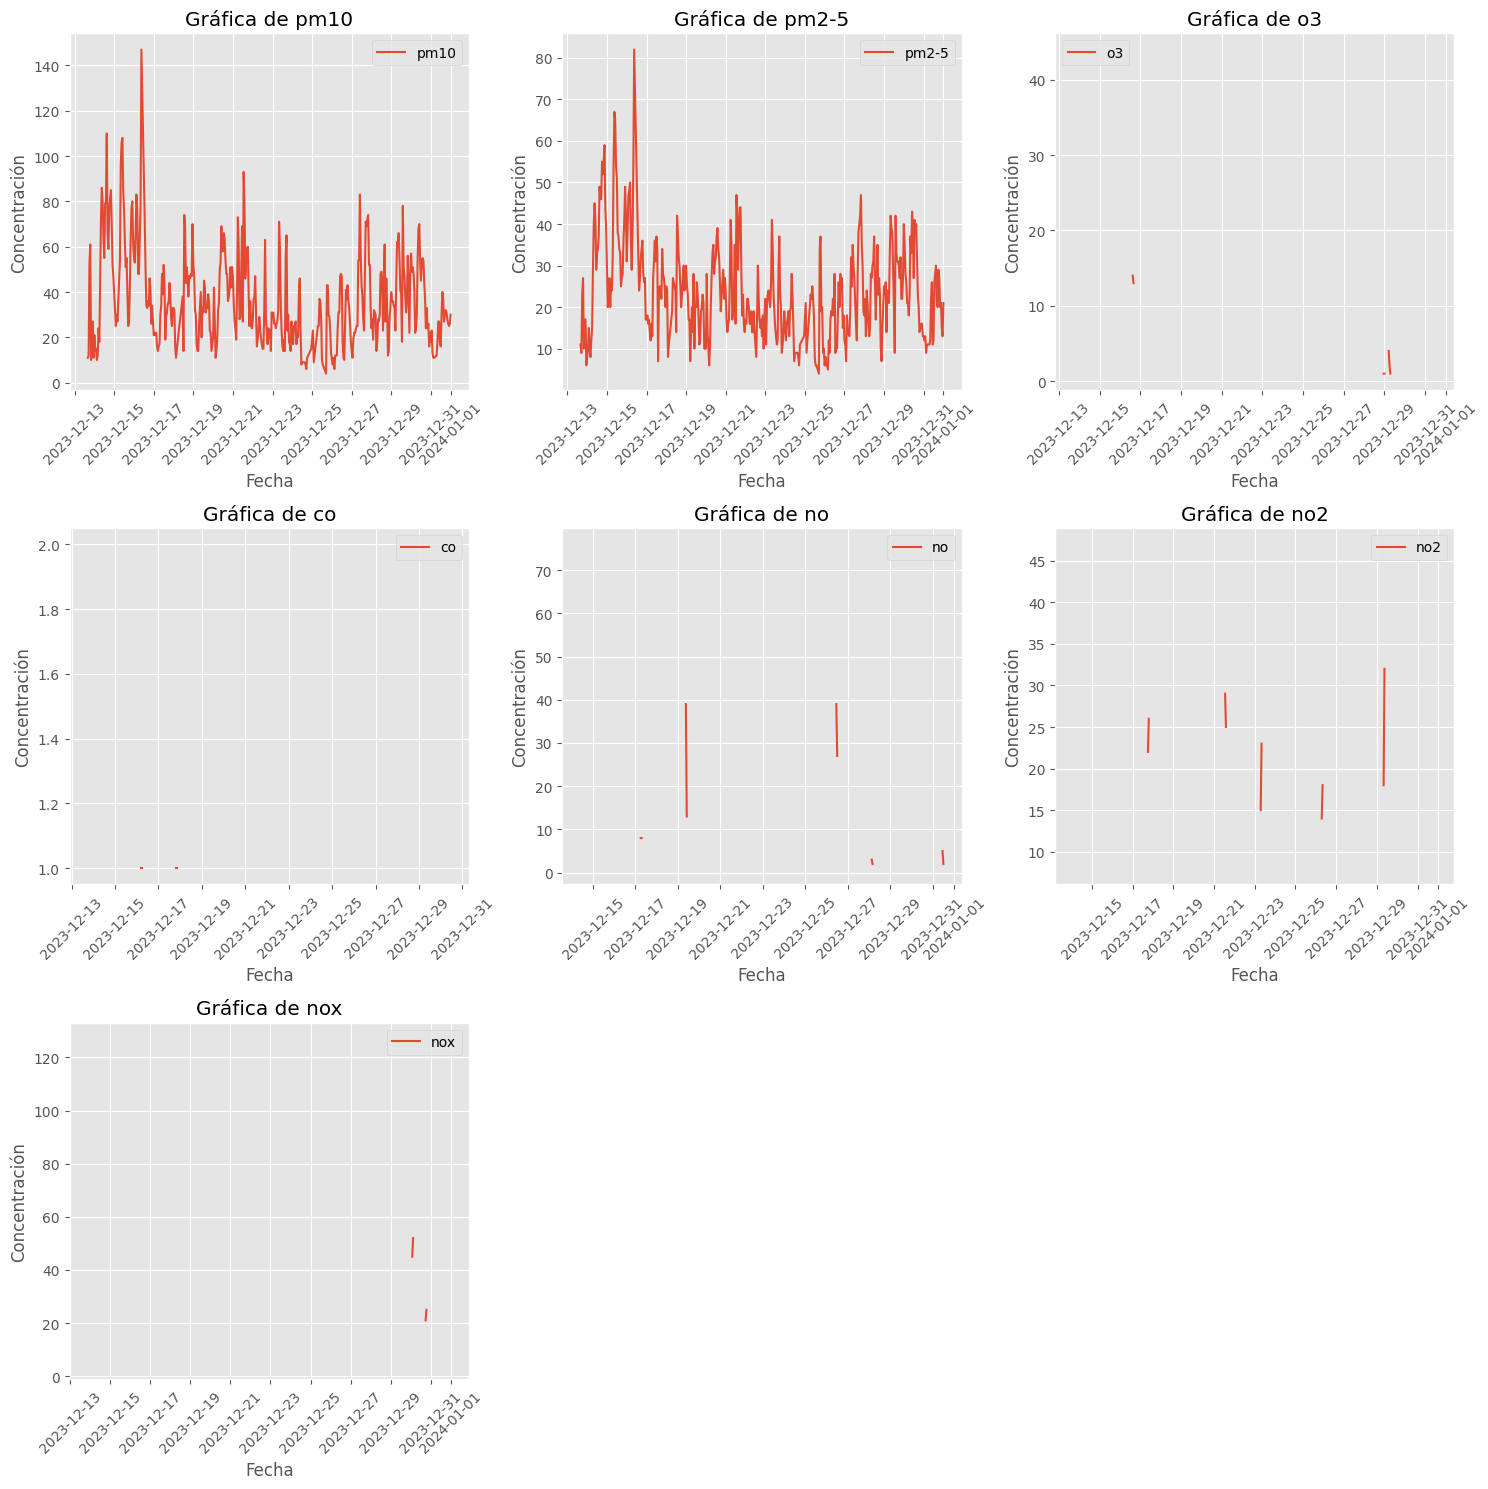

In [11]:
num_cols = 3
num_rows = len(contaminantes) // num_cols + (len(contaminantes) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(contaminantes):
    axes[i].plot(df[col], label=col)
    axes[i].set_title(f'Gráfica de {col}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Concentración')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(contaminantes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Preguntas

### 1. ¿Cuál es el día que en promedio tiene mayor concentración de pm2-5?


In [12]:
promedios_pm25 = df.groupby(df.index.weekday)['pm2-5'].mean()

# Encontrar el día con la mayor concentración promedio de 'pm2-5'
dia_mayor_pm25 = promedios_pm25.idxmax()
concentracion_mayor_pm25 = promedios_pm25.max()

print(f"El día con la mayor concentración promedio de pm2-5 es: {dia_mayor_pm25}")
print(f"Con una concentración promedio de: {concentracion_mayor_pm25}")

El día con la mayor concentración promedio de pm2-5 es: 3
Con una concentración promedio de: 27.77777777777778


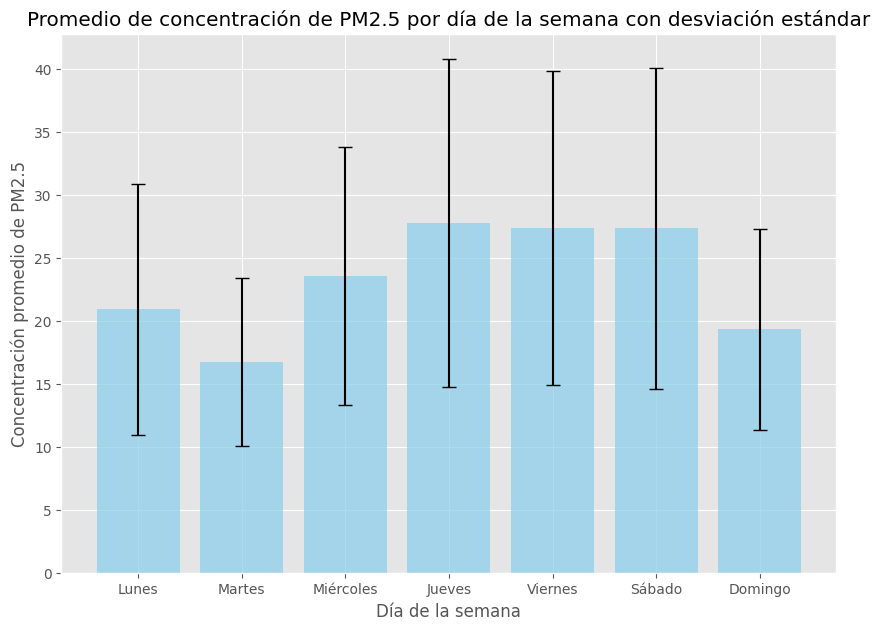

In [13]:
pm25_mean = df.groupby(df.index.weekday)['pm2-5'].mean()
pm25_std = df.groupby(df.index.weekday)['pm2-5'].std()

plt.figure(figsize=(10,7))
plt.bar(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], pm25_mean, yerr=pm25_std, capsize=5, color='skyblue', alpha=0.7)
plt.ylabel('Concentración promedio de PM2.5')
plt.xlabel('Día de la semana')
plt.title('Promedio de concentración de PM2.5 por día de la semana con desviación estándar')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### 2. ¿Cuál es la hora que en promedio tiene mayor concentración de pm2-5?

In [14]:
promedios_pm25_por_hora = df.groupby(df.index.hour)['pm2-5'].mean()

# Encontrar la hora con la mayor concentración promedio de 'pm2-5'
hora_mayor_pm25 = promedios_pm25_por_hora.idxmax()
concentracion_mayor_pm25 = promedios_pm25_por_hora.max()

print(f"La hora con la mayor concentración promedio de pm2-5 es: {hora_mayor_pm25}:00")
print(f"Con una concentración promedio de: {concentracion_mayor_pm25}")

La hora con la mayor concentración promedio de pm2-5 es: 9:00
Con una concentración promedio de: 33.35294117647059


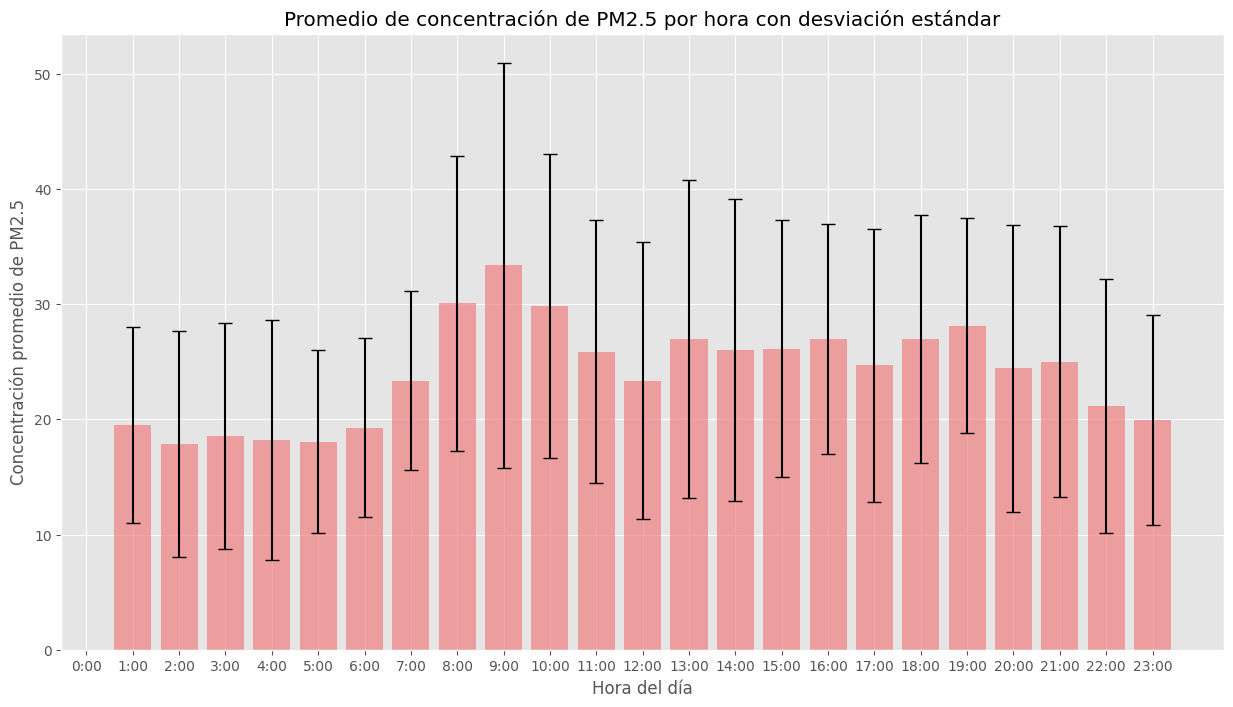

In [15]:
pm25_mean_hourly = df.groupby(df.index.hour)['pm2-5'].mean()
pm25_std_hourly = df.groupby(df.index.hour)['pm2-5'].std()

plt.figure(figsize=(15,8))
plt.bar(pm25_mean_hourly.index, pm25_mean_hourly, yerr=pm25_std_hourly, capsize=5, color='lightcoral', alpha=0.7)
plt.xticks(range(24), [f'{hour}:00' for hour in range(24)])
plt.xlabel('Hora del día')
plt.ylabel('Concentración promedio de PM2.5')
plt.title('Promedio de concentración de PM2.5 por hora con desviación estándar')
plt.grid(True)
plt.show()

### 3. Comparar los histogramas de la concentración de pm2-5 entre las 23:00 y las 2:00 y entre las 16:00 y las 19:00 (Excluir domingos)

In [16]:
df_filtered = df[df.index.weekday != 6]
night_hours = df_filtered.between_time('23:00', '02:00')
afternoon_hours = df_filtered.between_time('16:00', '19:00')

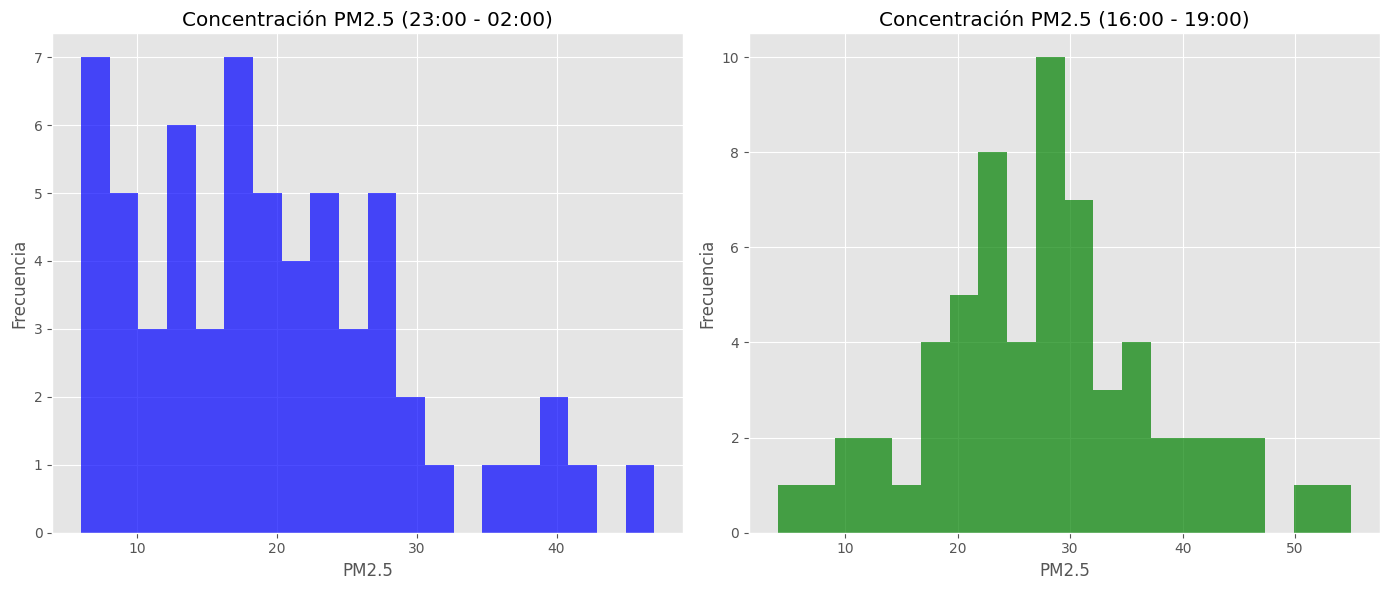

In [17]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(night_hours['pm2-5'], bins=20, color='blue', alpha=0.7)
plt.title('Concentración PM2.5 (23:00 - 02:00)')
plt.xlabel('PM2.5')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(afternoon_hours['pm2-5'], bins=20, color='green', alpha=0.7)
plt.title('Concentración PM2.5 (16:00 - 19:00)')
plt.xlabel('PM2.5')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

- Durante la tarde (16:00 - 19:00), parece haber una mayor cantidad de mediciones con concentraciones altas de PM2.5, especialmente alrededor de 20-30.
- En la noche (23:00 - 02:00), aunque hay algunas concentraciones más altas, estas son menos frecuentes y los datos están más dispersos.

# DS Vuelos

In [18]:
df2 = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

df2['Date'] = df2['year'].astype(str) + '-' + df2['month'].astype(str)
df2 = df2[['Date', 'passengers']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<ipython-input-18-137355e267b3>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date'] = pd.to_datetime(df2['Date'])


In [19]:
fechamax = df2['passengers'].idxmax()
print(df2['passengers'].max(), " PASAJEROS")
td_5days = pd.Timedelta('5 days')
print('Fecha con mayor número de pasajeros:', fechamax+td_5days)

622  PASAJEROS
Fecha con mayor número de pasajeros: 1960-07-06 00:00:00


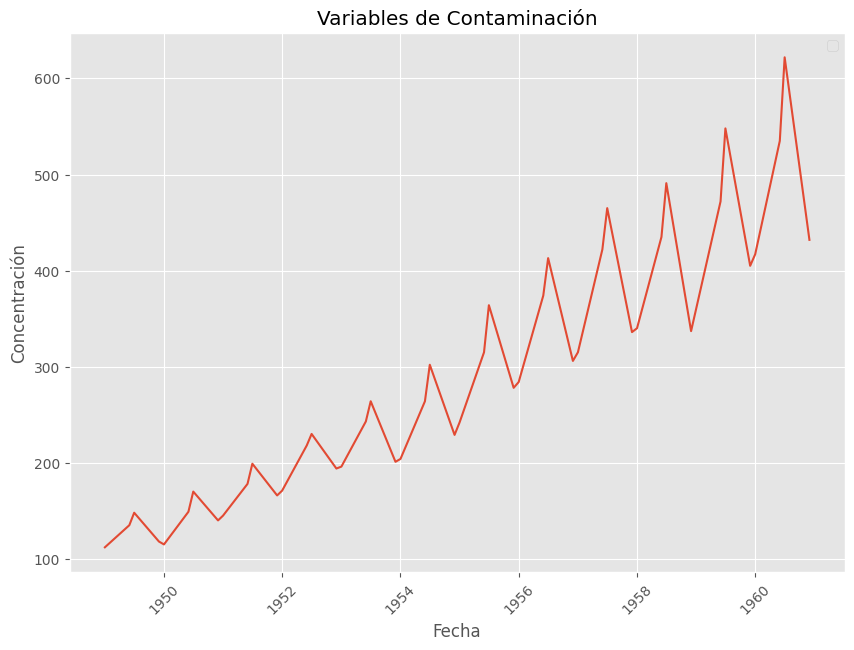

In [20]:
# prompt: Dame el código de la cantidad de pasajeros en los meses de junio y julio

df_f = df2[(df2.index.month == 6) | (df2.index.month == 7) | (df2.index.month == 12) | (df2.index.month == 1) ]

plt.figure(figsize=(10,7))

plt.plot(df_f)
plt.title('Variables de Contaminación')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Dataset 3

In [21]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/PBS.csv')
df3 = df3[df3['ATC2'] == 'A10']
df3 = df3[['Month', 'Cost']]
df3['Month'] = pd.to_datetime(df3['Month'])
df3.set_index('Month', inplace=True)

<ipython-input-21-f18b9718ca7c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Month'] = pd.to_datetime(df3['Month'])


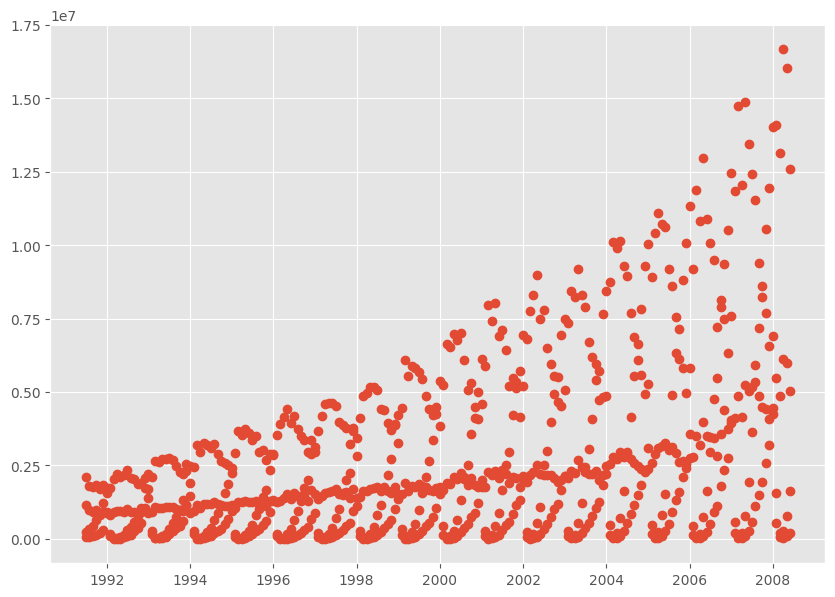

In [22]:
plt.figure(figsize=(10,7))
plt.plot(df3, marker='o', linestyle=' ')
plt.show()

In [23]:
df3_ = df3.groupby(df3.index).sum()

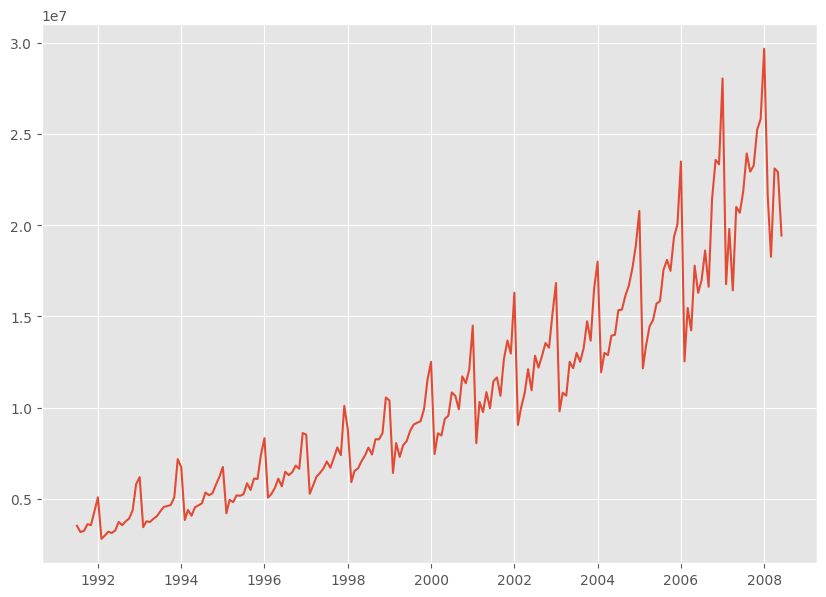

In [24]:
plt.figure(figsize=(10,7))
plt.plot(df3_)
plt.show()